# Sanity check

In [2]:
!which python

/home/amar/Desktop/projects/NFS/nfs_venv/bin/python


In [3]:
!pwd

/home/amar/Desktop/projects/NFS


# Imports

In [41]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Video
from sklearn.cluster import KMeans
import seaborn as sns

# Paths and Files

In [2]:
project_dir = os.getcwd()
processed_videos_dir = os.path.join(project_dir, 'data', 'outputs')
raw_videos_dir = os.path.join(project_dir, 'data', 'videos')
# os.listdir(raw_videos_dir)

In [3]:
paths = {
    'project_dir': project_dir,
    'processed_videos_dir': processed_videos_dir,
    'raw_videos_dir': raw_videos_dir
}

# Reading data

In [4]:
paths

{'project_dir': '/home/amar/Desktop/projects/NFS',
 'processed_videos_dir': '/home/amar/Desktop/projects/NFS/data/outputs',
 'raw_videos_dir': '/home/amar/Desktop/projects/NFS/data/videos'}

In [4]:
cap = cv.VideoCapture(os.path.join(paths['processed_videos_dir'], 'highway_footage_tpp.avi'))
test_frame = None
while True:
    ret, frame = cap.read()
    if ret:
        test_frame = frame
        break
        cv.imshow('Test', frame)
        pass
    else:
        print("frame not read, exiting")
        break

    if cv.waitKey(1) == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

test_frame = test_frame[:, :, 0]

# ROI
test_frame = test_frame[200:, :]
test_frame.shape

# Experiments

## Thresholding

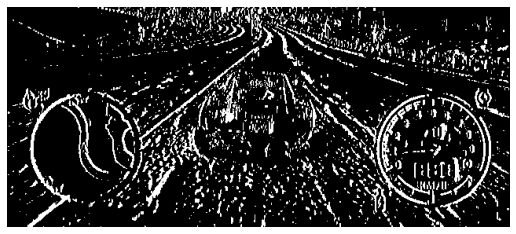

In [46]:
_, thresh_test_frame = cv.threshold(test_frame, 127, 255, cv.THRESH_BINARY)
plt.figure(figsize=(9,12))
plt.imshow(thresh_test_frame, cmap='gist_gray')
plt.axis('off')
plt.show()

In [47]:
np.unique(thresh_test_frame), thresh_test_frame.shape

(array([  0, 255], dtype=uint8), (280, 640))

## Clustering based on the x-coordinates

In [19]:
result = np.where(thresh_test_frame == 255)
type(result), type(result[0]), thresh_test_frame.shape

(tuple, numpy.ndarray, (480, 640))

In [36]:
y, x = result
x

array([238, 233, 234, ..., 555, 583, 584])

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(x.reshape(-1,1))

In [40]:
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

<AxesSubplot:>

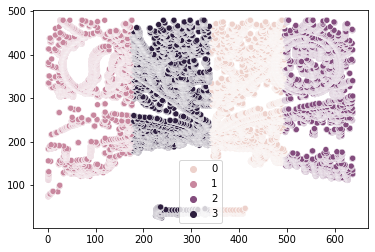

In [43]:
sns.scatterplot(x=x, y=y, hue=labels)